In [1]:
import pandas as pd, numpy as np 

In [4]:
data = pd.read_csv('../data/chicago_taxi_trips_2016_11.csv') 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295000 entries, 0 to 1294999
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   taxi_id                 1294453 non-null  float64
 1   trip_start_timestamp    1295000 non-null  object 
 2   trip_end_timestamp      1294850 non-null  object 
 3   trip_seconds            1294564 non-null  float64
 4   trip_miles              1294987 non-null  float64
 5   pickup_census_tract     0 non-null        float64
 6   dropoff_census_tract    826575 non-null   float64
 7   pickup_community_area   1176867 non-null  float64
 8   dropoff_community_area  1149193 non-null  float64
 9   fare                    1294983 non-null  float64
 10  tips                    1294983 non-null  float64
 11  tolls                   1294983 non-null  float64
 12  extras                  1294983 non-null  float64
 13  trip_total              1294983 non-null  float64
 14  pa

In [5]:
clean_data = data[['pickup_community_area', 'dropoff_community_area', 'trip_seconds']].dropna()
clean_data = clean_data[clean_data.trip_seconds>300.0]

In [6]:
clean_data.head()

,pickup_community_area,dropoff_community_area,trip_seconds
0,33.0,28.0,840.0
1,32.0,28.0,540.0
2,8.0,3.0,1200.0
3,32.0,8.0,480.0
5,24.0,4.0,1440.0


#### group data by station

In [7]:
sorted_data = clean_data.sort_values(by=['pickup_community_area', 'dropoff_community_area'], ascending=True)

In [8]:
sorted_data.head()

,pickup_community_area,dropoff_community_area,trip_seconds
31,1.0,1.0,360.0
347,1.0,1.0,660.0
744,1.0,1.0,420.0
3510,1.0,1.0,401.0
22054,1.0,1.0,780.0


#### Mean time from one station to another 

In [9]:
final_data = sorted_data.groupby(['pickup_community_area', 'dropoff_community_area'], as_index=False)['trip_seconds'].mean()
# df.groupby('A').mean()
final_data['trip_seconds'] = final_data['trip_seconds'].round(0)

In [10]:
final_data.head()

,pickup_community_area,dropoff_community_area,trip_seconds
0,1.0,1.0,920.0
1,1.0,2.0,621.0
2,1.0,3.0,749.0
3,1.0,4.0,766.0
4,1.0,5.0,1010.0


In [11]:
# unique values
unique_nodes = final_data['pickup_community_area'].unique().shape[0]

In [12]:
final_data_np = final_data.to_numpy()

In [44]:
# final_data_np[[0]]

    

array([[1.00000000e+00, 1.00000000e+00, 9.20431373e+02],
       [1.00000000e+00, 2.00000000e+00, 6.20733564e+02],
       [1.00000000e+00, 3.00000000e+00, 7.49194946e+02],
       ...,
       [7.70000000e+01, 7.30000000e+01, 2.58000000e+03],
       [7.70000000e+01, 7.60000000e+01, 2.45211799e+03],
       [7.70000000e+01, 7.70000000e+01, 1.08051111e+03]])

#### Init adjacency matrix

In [13]:
adjacency_matrix = np.zeros((unique_nodes, unique_nodes))

In [14]:
# fill adjacency matrix 
counter = 0 
for i, j in final_data_np[:, 0:2]:
    row = int(i) - 1 
    col = int(j) - 1 
    adjacency_matrix[row, col] = final_data_np[[counter]][0][2]
    counter += 1 
        

In [15]:
adjacency_matrix

array([[ 920.,  621.,  749., ...,    0., 2566.,  634.],
       [ 641., 1467.,  914., ...,    0., 2483.,  750.],
       [ 843., 1043., 1011., ...,    0., 2654.,  618.],
       ...,
       [   0.,    0.,    0., ...,  600.,    0.,    0.],
       [2445., 2059., 2377., ..., 3390., 1644., 2419.],
       [ 656.,  803.,  628., ...,    0., 2452., 1081.]])

In [16]:
adjacency_df = pd.DataFrame(adjacency_matrix)
adjacency_df

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,920.0,621.0,749.0,766.0,1010.0,848.0,1242.0,1515.0,900.0,1650.0,...,0.0,0.0,3060.0,0.0,0.0,0.0,0.0,0.0,2566.0,634.0
1,641.0,1467.0,914.0,656.0,962.0,1099.0,1191.0,1550.0,1080.0,1560.0,...,0.0,3300.0,0.0,0.0,0.0,0.0,0.0,0.0,2483.0,750.0
2,843.0,1043.0,1011.0,632.0,730.0,587.0,847.0,881.0,2085.0,1916.0,...,0.0,2640.0,0.0,1560.0,0.0,0.0,0.0,0.0,2654.0,618.0
3,864.0,683.0,690.0,852.0,527.0,786.0,1120.0,1283.0,1404.0,1545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1988.0,624.0
4,1029.0,1132.0,673.0,586.0,836.0,604.0,834.0,1254.0,1140.0,1520.0,...,2880.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980.0,887.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.0,0.0,0.0,0.0,0.0,1380.0,0.0,1680.0,0.0,0.0,...,780.0,0.0,0.0,720.0,0.0,7740.0,0.0,420.0,2970.0,0.0
73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1320.0,840.0,0.0,1320.0,0.0,600.0,0.0,0.0
75,2445.0,2059.0,2377.0,2018.0,2022.0,2423.0,2381.0,2509.0,1089.0,929.0,...,6120.0,3372.0,3135.0,3451.0,3254.0,3045.0,2592.0,3390.0,1644.0,2419.0


#### Spectral clustering

In [17]:
from sklearn.preprocessing import normalize
x_normed = normalize(adjacency_matrix, axis=0, norm='l2')

In [18]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(8, affinity='precomputed', n_init=10, assign_labels='discretize')
sc.fit_predict(x_normed)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(**kwargs)


array([3, 3, 2, 3, 0, 4, 4, 5, 0, 0, 0, 0, 0, 2, 3, 0, 0, 2, 0, 0, 3, 0,
       0, 3, 4, 5, 7, 6, 7, 7, 3, 5, 5, 4, 7, 4, 4, 1, 1, 4, 3, 4, 1, 1,
       1, 4, 6, 1, 1, 1, 1, 3, 1, 5, 5, 0, 2, 5, 0, 5, 7, 3, 3, 5, 3, 4,
       1, 4, 1, 5, 4, 5, 1, 5, 1, 5, 0])

In [19]:
sc.labels_.shape

(77,)

In [21]:
import networkx as nx
def draw(G):
    from pylab import rcParams
    rcParams['figure.figsize'] = 14, 10

    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, node_size=500, node_color ='green')
    # labels = nx.get_edge_attributes(G, 'weight') 
    # nx.draw_networkx_edge_labels(G, pos, edge_labels=labels) 

#### All 8 clusters together

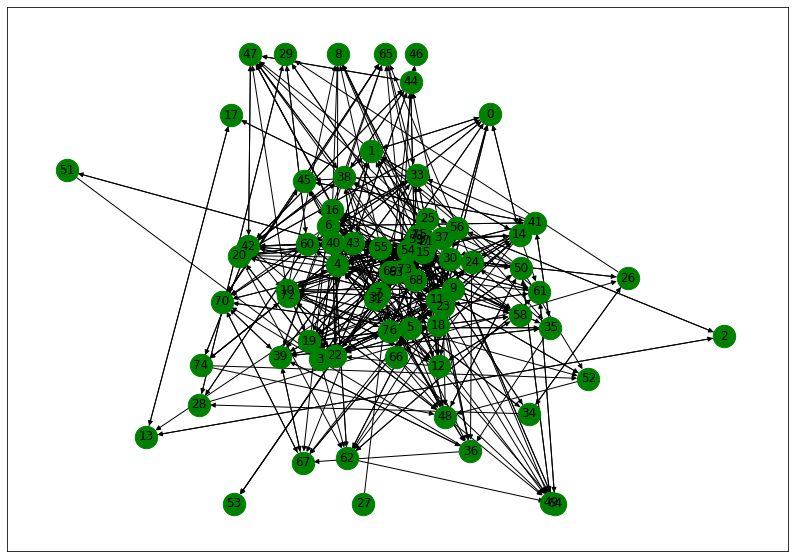

In [22]:
for i in range(8):
    # c = adjacency_df[sc.labels_ == 0 ]
    G = nx.from_pandas_adjacency(adjacency_df[sc.labels_ == i ], create_using=nx.DiGraph) 
    draw(G)

# c2 = adjacency_df[sc.labels_ == 1 ]

#### plot 8 clusters separately

In [23]:
c0 = adjacency_df[sc.labels_ == 0 ]
c1 = adjacency_df[sc.labels_ == 1 ]
c2 = adjacency_df[sc.labels_ == 2 ]
c3 = adjacency_df[sc.labels_ == 3 ]
c4 = adjacency_df[sc.labels_ == 4 ]
c5 = adjacency_df[sc.labels_ == 5 ]
c6 = adjacency_df[sc.labels_ == 6 ]
c7 = adjacency_df[sc.labels_ == 7 ]

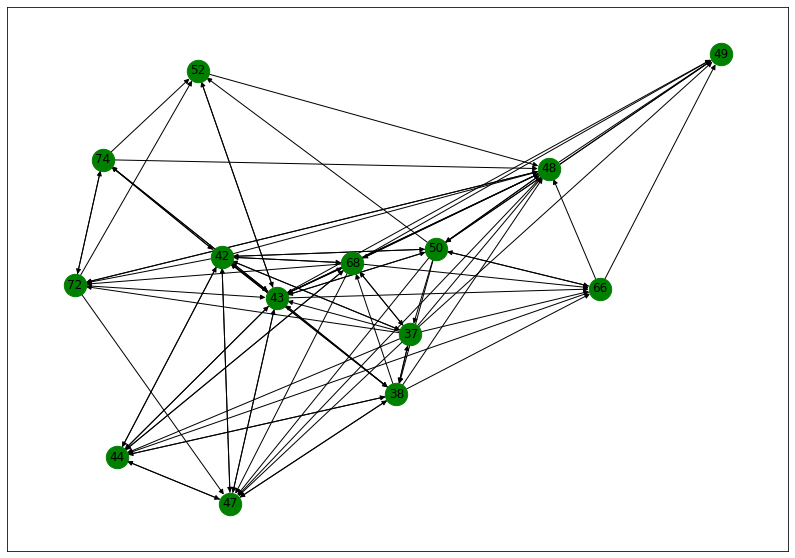

In [24]:
## Directed Graph 
G_di = nx.from_pandas_adjacency(c1, create_using=nx.DiGraph) 
draw(G_di)

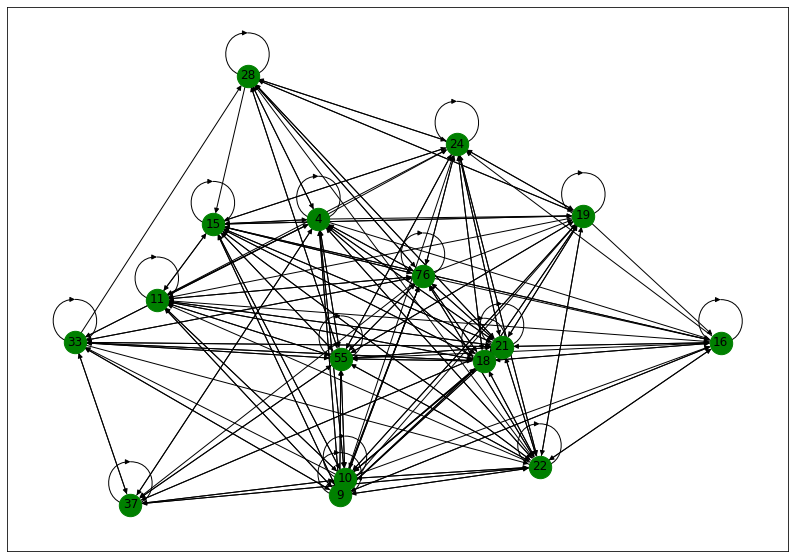

In [55]:
G_di = nx.from_pandas_adjacency(c2, create_using=nx.DiGraph) 
draw(G_di)

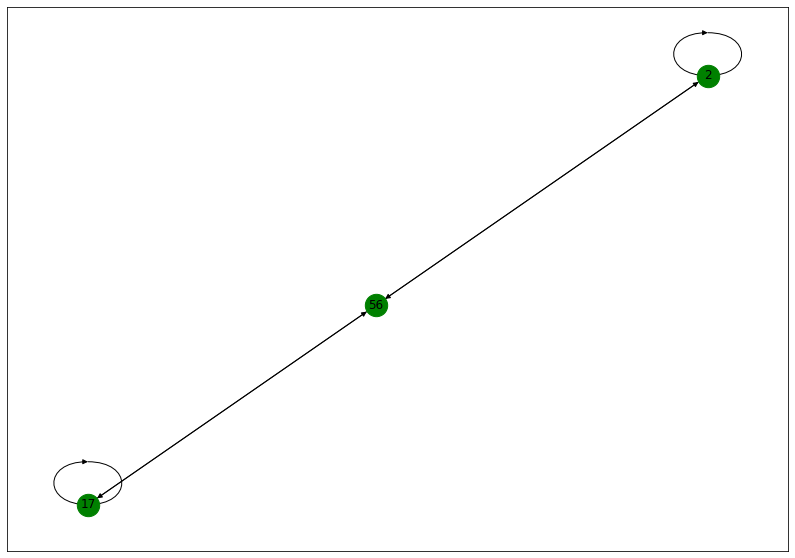

In [56]:
G_di = nx.from_pandas_adjacency(c3, create_using=nx.DiGraph) 
draw(G_di)

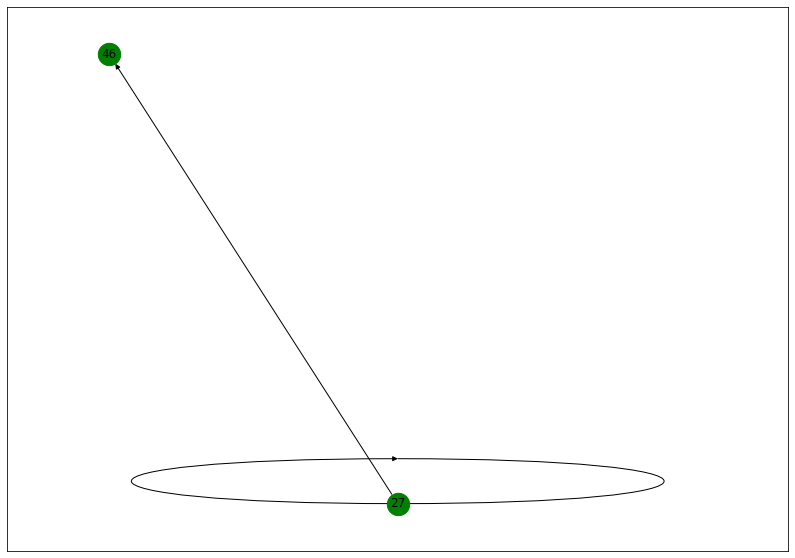

In [57]:
G_di = nx.from_pandas_adjacency(c4, create_using=nx.DiGraph) 
draw(G_di)

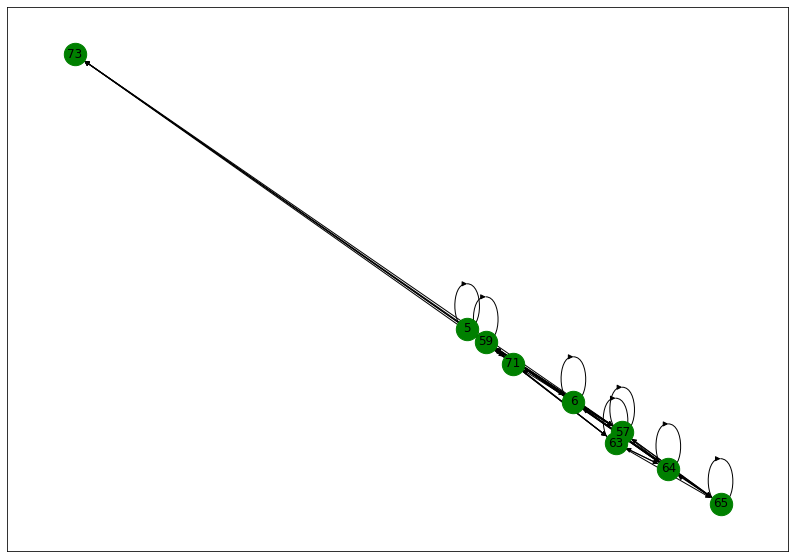

In [58]:
G_di = nx.from_pandas_adjacency(c5, create_using=nx.DiGraph) 
draw(G_di)

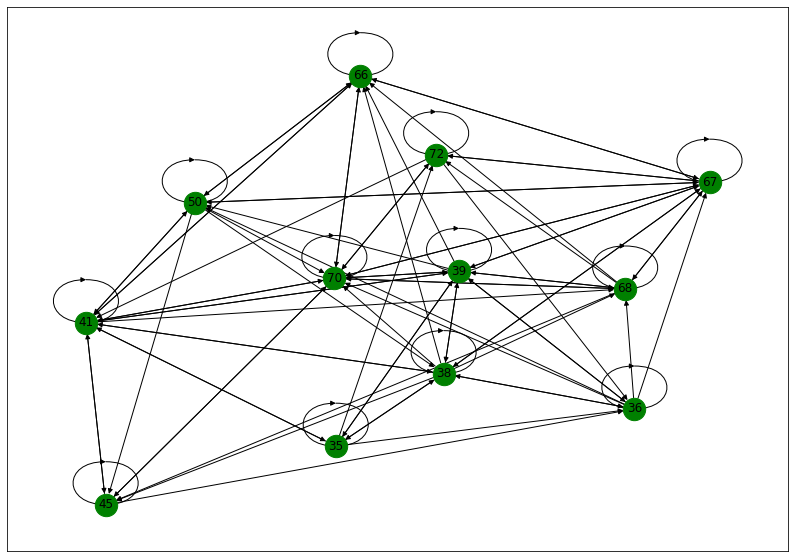

In [59]:
G_di = nx.from_pandas_adjacency(c6, create_using=nx.DiGraph) 
draw(G_di)

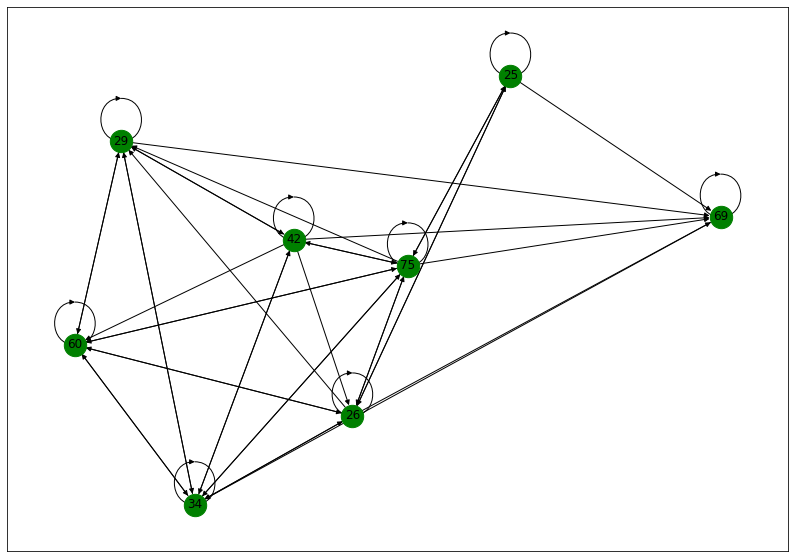

In [60]:
G_di = nx.from_pandas_adjacency(c7, create_using=nx.DiGraph) 
draw(G_di)